In [1]:
# Omid55
import teams_of_teams_problem
import methods
import numpy as np
import time
import gc
import matplotlib.pyplot as plt

functions

In [2]:
def plot_all_for_problem(problem):
    n = problem.n
    m = problem.m
    k = problem.k
    # a distribution of all score functions
    # creating a population
    population_size = 1000
    population = []
    for i in range(population_size):
        people = np.random.choice(n, m * k, replace=False)
        instance = [list(sorted(people[i * m:(i + 1) * m])) for i in range(k)]
        population.append(instance)
    # computing their fitnesses
    # objectives
    objs = [problem.score1, problem.score2, problem.score3, problem.objective_function]
    for obj in objs:
        print(obj)
        start_time = time.time()
        fitnesses = []
        for instance in population:
            fitnesses.append(obj(instance))
        fitnesses = np.array(fitnesses)
        duration = round(time.time() - start_time, 2)
        print('(in ', duration, 's).')
        # plotting
        #sns.distplot(fitnesses)
        plt.hist(fitnesses)
        plt.show()
        print('\n\n\n\n')

Running

In [3]:
# p1 = teams_of_teams_problem.Problem(n=15, s=1, m=3, k=4, alpha=1/3, beta=1/3)
# plot_all_for_problem(p1)

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7ff008da6c18>>
(in  0.34 s).


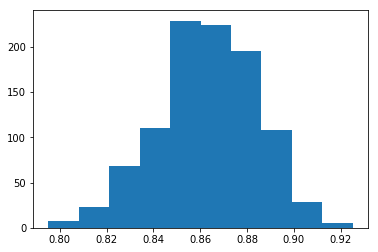






<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7ff008da6c18>>
(in  0.98 s).


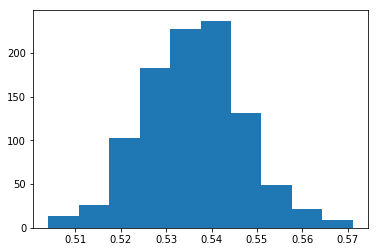






<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7ff008da6c18>>
(in  0.45 s).


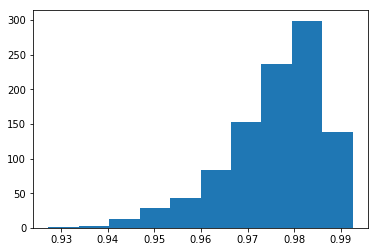






<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7ff008da6c18>>
(in  1.71 s).


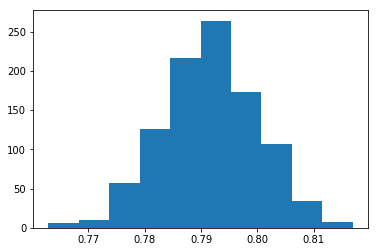

In [4]:
p2 = teams_of_teams_problem.Problem(n=1000, s=1, m=10, k=16, alpha=1/3, beta=1/3)
plot_all_for_problem(p2)

In [5]:
# p3 = teams_of_teams_problem.Problem(n=1000, s=1, m=10, k=20, alpha=1/3, beta=1/3)
# plot_all_for_problem(p3)

<bound method Problem.score1 of <teams_of_teams_problem.Problem object at 0x7feffbee5240>>
(in  0.68 s).


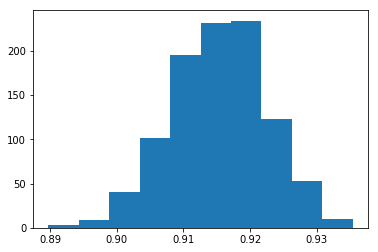






<bound method Problem.score2 of <teams_of_teams_problem.Problem object at 0x7feffbee5240>>
(in  4.05 s).


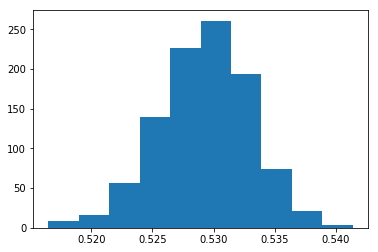






<bound method Problem.score3 of <teams_of_teams_problem.Problem object at 0x7feffbee5240>>
(in  1.02 s).


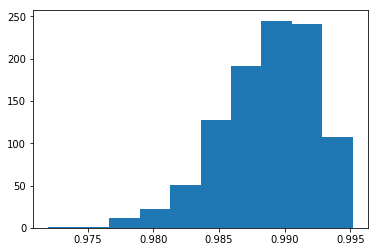






<bound method Problem.objective_function of <teams_of_teams_problem.Problem object at 0x7feffbee5240>>
(in  5.88 s).


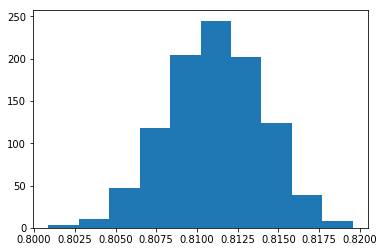

In [6]:
p4 = teams_of_teams_problem.Problem(n=1000, s=1, m=20, k=30, alpha=1/3, beta=1/3)
plot_all_for_problem(p4)